In [14]:
import pandas as pd
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from scipy.spatial import distance as sdist

df = pd.read_csv('personality.csv')

df = df[['Agreeableness', 'Conscientiousness', 'Intellect', 'Neuroticism', 'Extraversion']]


df.head()

,Agreeableness,Conscientiousness,Intellect,Neuroticism,Extraversion
0,4.2,4.6,4.2,2.8,4.0
1,3.6,3.8,3.6,4.6,4.0
2,4.4,4.2,4.2,4.2,4.0
3,4.2,4.8,4.4,3.6,4.0
4,4.6,3.8,3.8,3.4,2.0


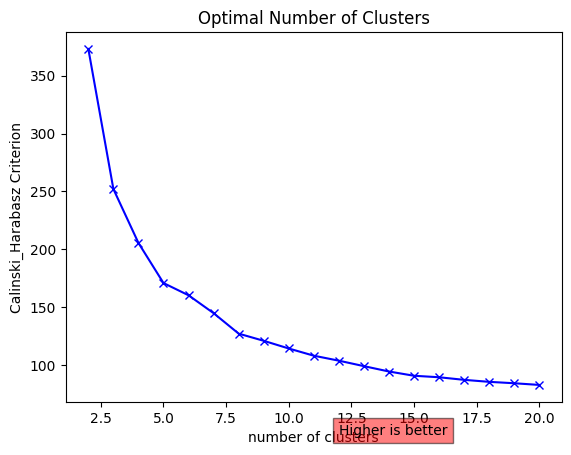

In [15]:
# Calinski and Harabasz Criterion
from sklearn.metrics import calinski_harabasz_score
from matplotlib import pyplot as plt

ch_score = []
for n in range(2, 21):
  kmeans = KMeans(n, random_state=1, n_init='auto').fit(df)
  ch_score.append(calinski_harabasz_score(df, labels=kmeans.labels_))

plt.plot(range(2, 21), ch_score, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('Calinski_Harabasz Criterion')
plt.title('Optimal Number of Clusters')
plt.text(12, 40, 'Higher is better', bbox=dict(facecolor='red', alpha=0.5))
plt.show()

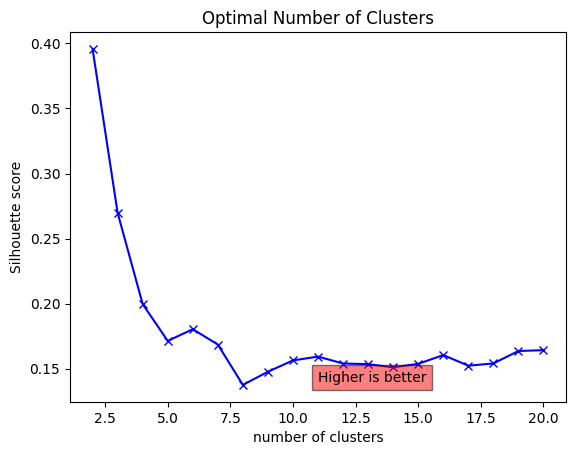

In [16]:
# Silhouette Analysis
from sklearn.metrics import silhouette_score

si_score = []
for n in range(2, 21):
 kmeans = KMeans(n, random_state=1, n_init='auto').fit(df)
 si_score.append(silhouette_score(df, kmeans.labels_))

plt.plot(range(2, 21), si_score, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('Silhouette score')
plt.title('Optimal Number of Clusters')
plt.text(11, .14, 'Higher is better', bbox=dict(facecolor='red', alpha=0.5))
plt.show()

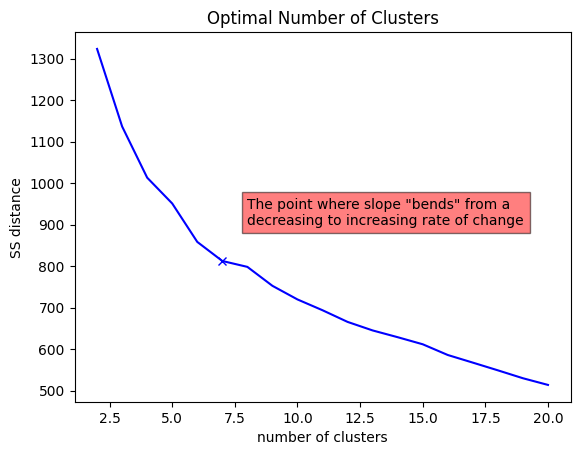

In [19]:
# WCSS: Elbow Method

ss_score = []
for n in range(2,21):
    kmeans = KMeans(n, random_state=1, n_init='auto').fit(df)
    ss_score.append(kmeans.inertia_)

# Where does the slope bend? Find the highest (least negative) slope.
changes = []
for n in range(2, 20):
  changes.append(float(ss_score[n - 1] - ss_score[n - 2]))

optimal_n = changes.index(max(changes))

plt.plot(range(2,21), ss_score, 'bx-', markevery=[optimal_n])
plt.xlabel('number of clusters')
plt.ylabel('SS distance')
plt.title('Optimal Number of Clusters')
plt.text(8, 900, 'The point where slope "bends" from a \ndecreasing to increasing rate of change', bbox=dict(facecolor='red', alpha=0.5))
plt.show()

# Keep in mind that the y and x axes are on different scales. Thus, although the
# bend appears to be around 7-10 clusters, it's actually at 19.

In [21]:
kmeans = KMeans(2, random_state=1, n_init='auto').fit(df)

df['cluster'] = kmeans.labels_
df


,Agreeableness,Conscientiousness,Intellect,Neuroticism,Extraversion,cluster
0,4.2,4.6,4.2,2.8,4.0,0
1,3.6,3.8,3.6,4.6,4.0,0
2,4.4,4.2,4.2,4.2,4.0,0
3,4.2,4.8,4.4,3.6,4.0,0
4,4.6,3.8,3.8,3.4,2.0,0
...,...,...,...,...,...,...
427,7.0,4.8,5.2,5.0,5.2,1
428,5.4,3.6,3.6,3.8,4.0,0
429,4.6,3.0,3.8,3.4,4.2,0
430,5.8,4.4,3.6,7.0,5.8,1


In [25]:
df_means = pd.DataFrame({'Cluster0_means':df.loc[df['cluster'] == 0].mean(),
                         'Cluster1_means':df.loc[df['cluster'] == 1].mean()})

df_means['difference'] = abs(df_means['Cluster0_means'] - df_means['Cluster1_means'])

df_means.sort_values(by =['difference'], ascending=False)


,Cluster0_means,Cluster1_means,difference
Extraversion,3.600000,5.610,2.010000
Neuroticism,3.348276,5.079,1.730724
Agreeableness,4.463793,6.034,1.570207
Intellect,3.787069,4.813,1.025931
cluster,0.000000,1.000,1.000000
Conscientiousness,4.081897,4.454,0.372103


In [ ]:
fig = px.scatter_3d(df_cluster, x='EXT', y='NEU', z='INT', color='cluster', size_max=20, opacity=1.0)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [ ]:
import gower
distance_matrix = gower
df